# Predicting Wine Quality from Chemical Characteristics
## Team 3 Final Project

Team 3 Members:  Tyler Foreman, Daniel Grant

Date:  June 6, 2023


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import statistics
import seaborn as sns
from pprint import pprint
import statsmodels.api as sm
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Modelling
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingClassifier



## Exploratory Data Analysis
 
 - Load data into dataframe
 - Generate and review descriptive statistics of the dataset/variables
 - Plot visualization of data spread for each variable
 - Review and plot correlations of variables to outcome (quality)
 - Possibly perform statistical analysis of variable correlations to outcomes
 - Analyze and develop hypothesis of varialbes with weak correlation to output (and can be excluded during feature selection)
 


In [2]:
# Start code here
white_wines_full = pd.read_csv('./winequality-white.csv', sep=';')
white_wines_full.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# get descriptive statistics
white_wines_full.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


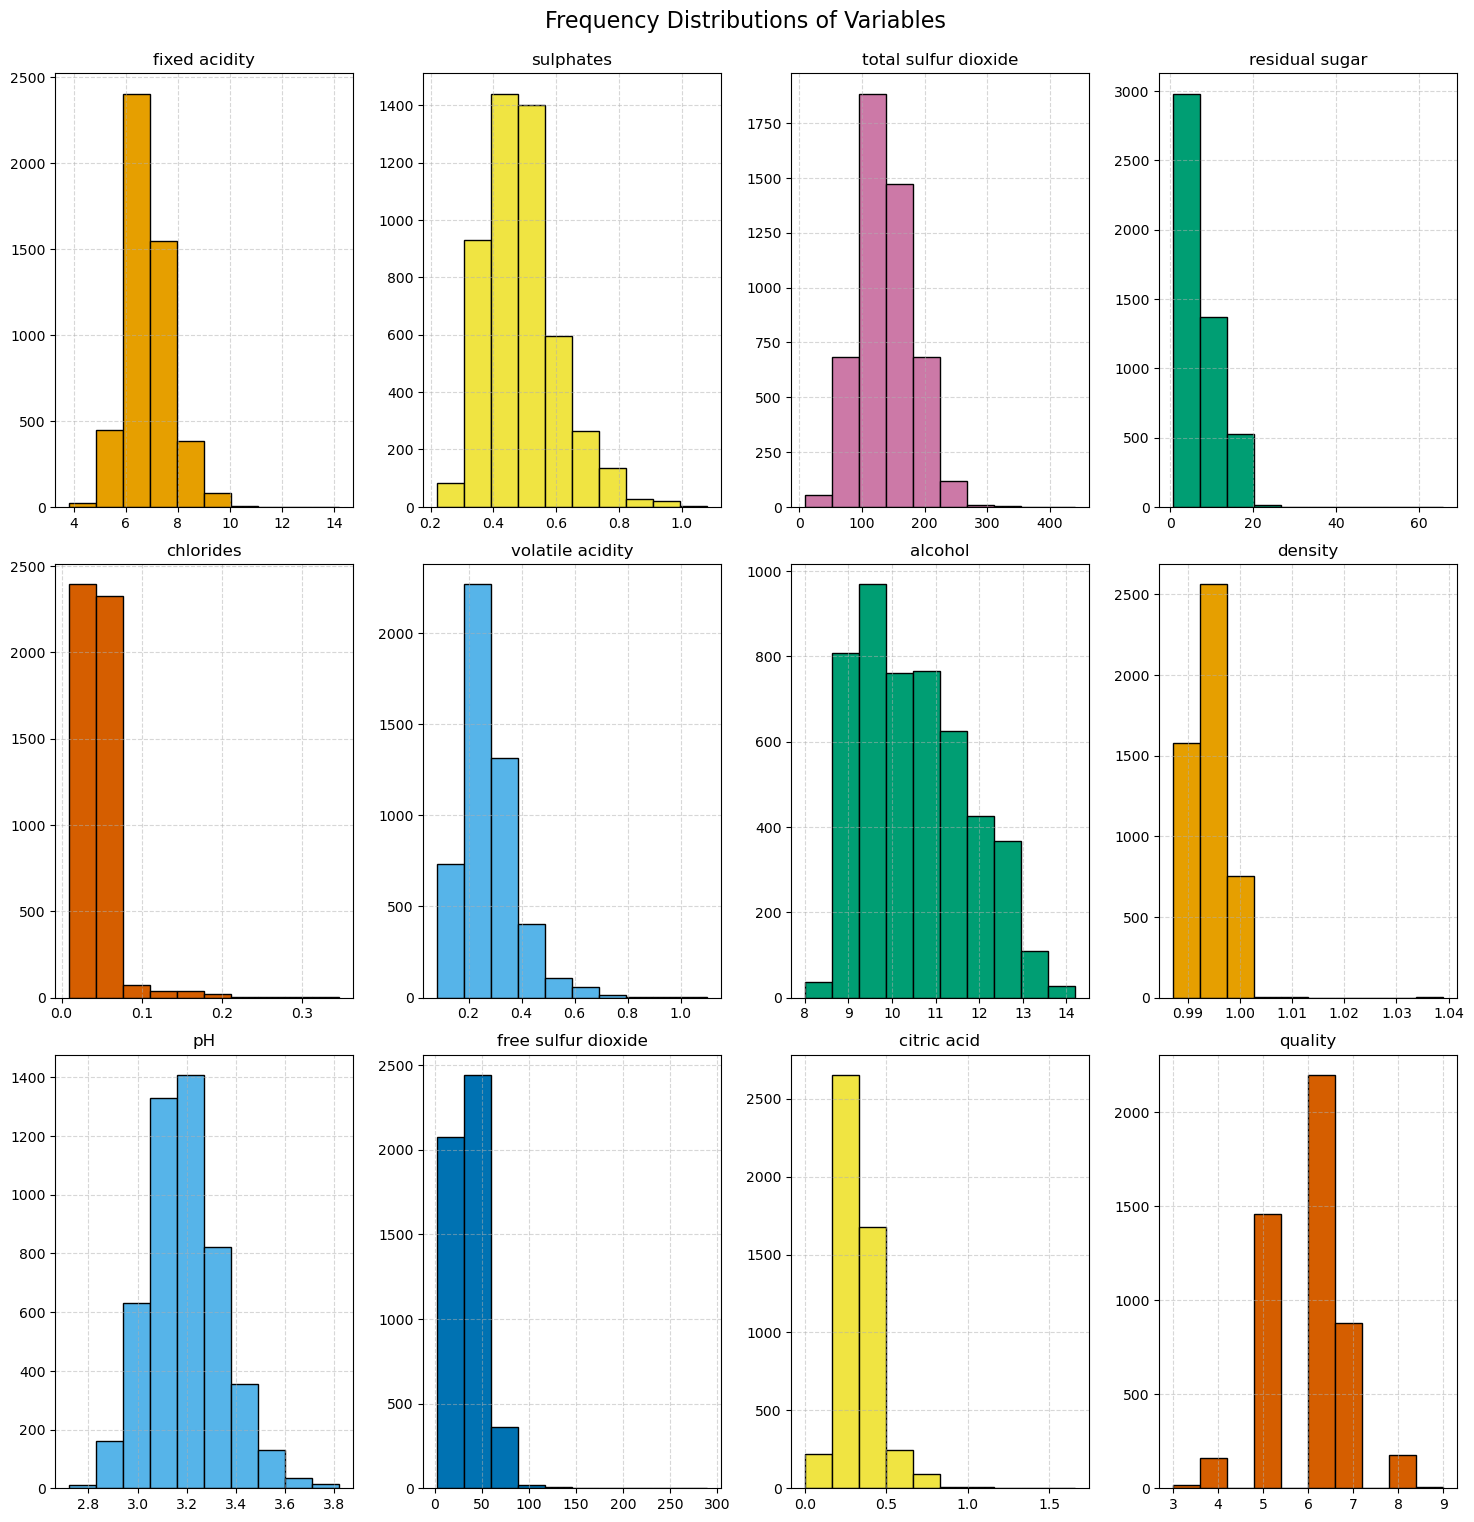

In [4]:
# plot variable distributions
fig, ax_list = plt.subplots(3, 4)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.tight_layout(pad=2)
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', '#0072B2', '#CC79A7']

# iterate columns (variables) and plot freqeuncy distribution
for i in range(len(white_wines_full.columns)):
    col = white_wines_full.columns[i]
    plt_ax = ax_list[i % 3, i % 4]
    plt_ax.hist(white_wines_full[col], color=colors[i % len(colors)], edgecolor='black')
    plt_ax.set_title(col, fontsize=12)
    plt_ax.grid(True, linestyle='--', alpha=0.5)

fig.suptitle('Frequency Distributions of Variables', fontsize=16, y=1.02)
plt.show()

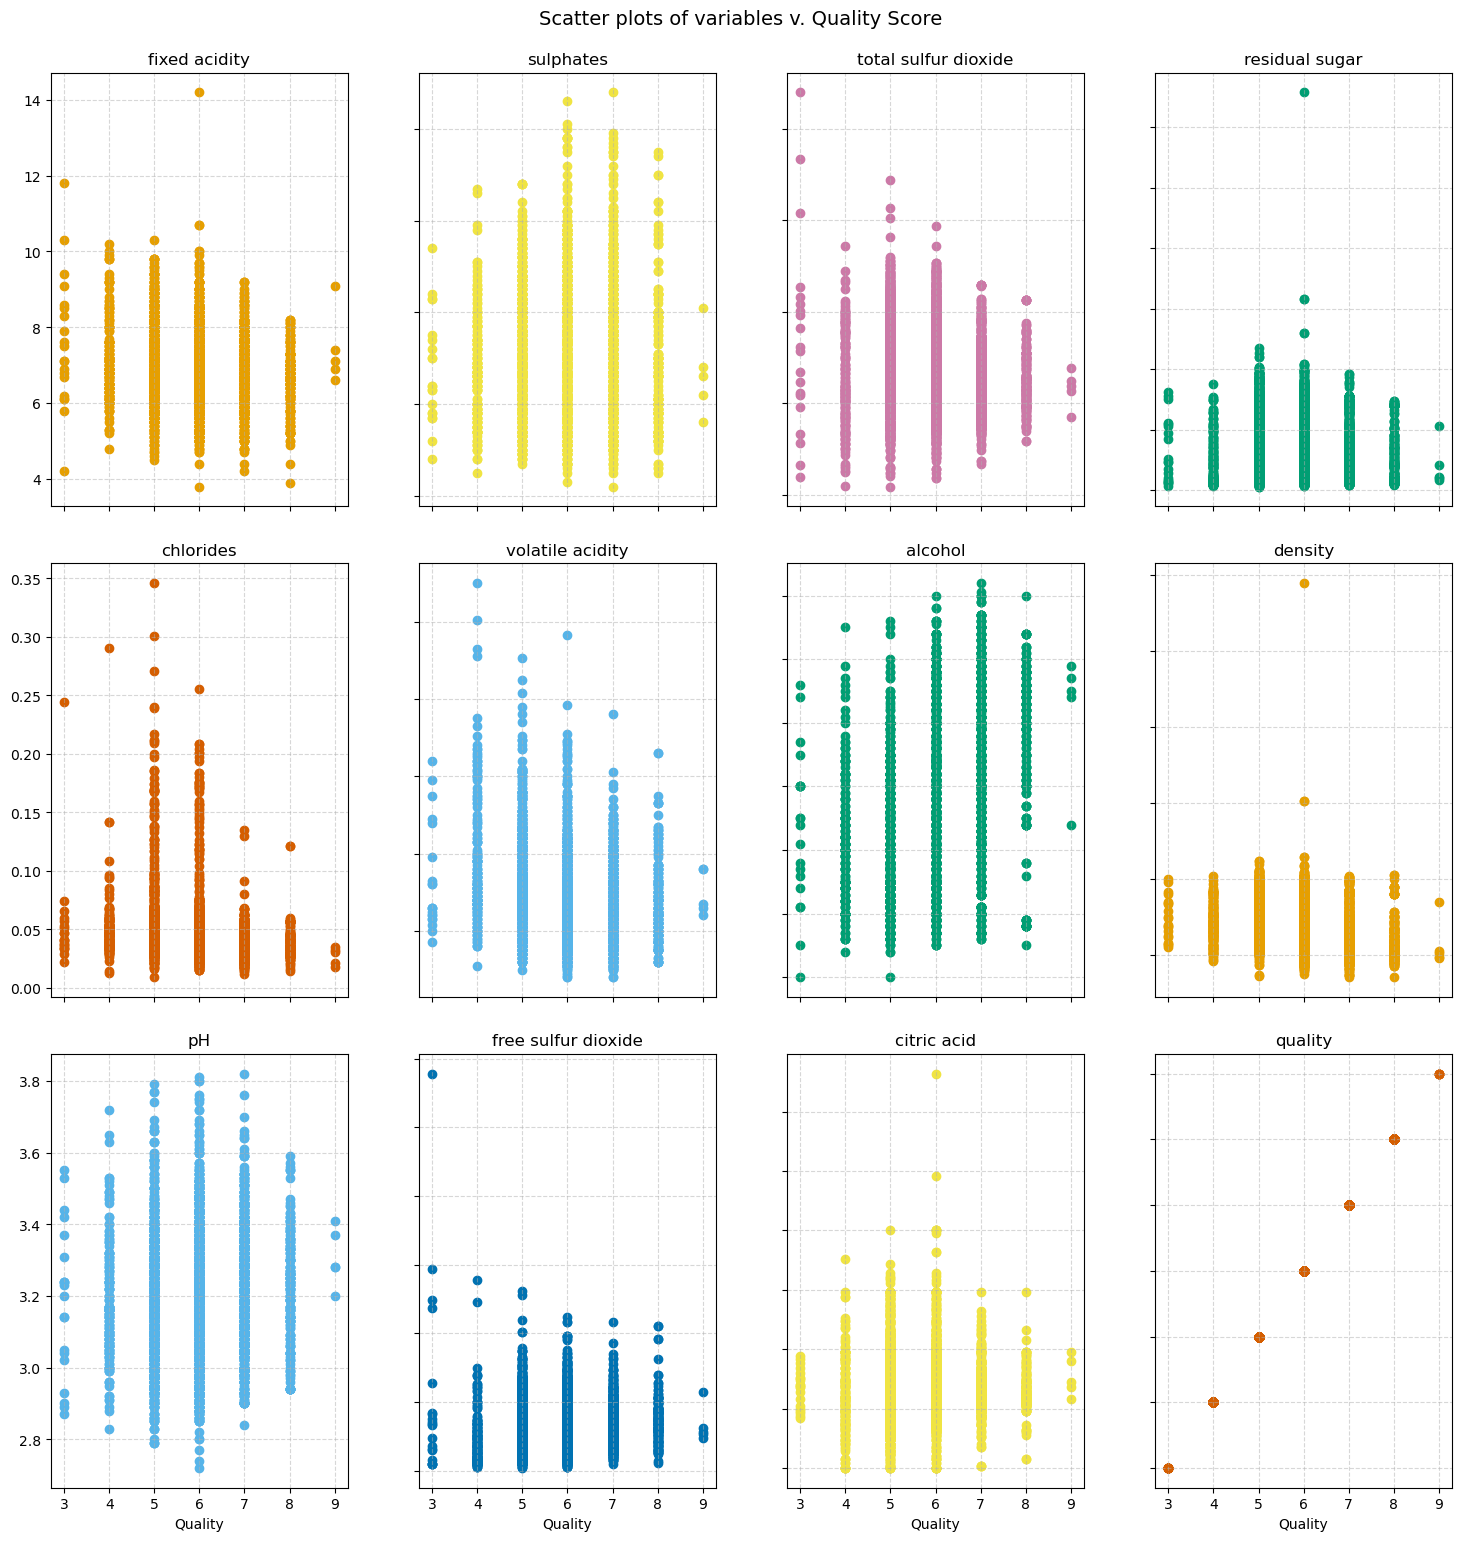

In [5]:
# plot variables vs. output
fig, ax_list = plt.subplots(3, 4)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.tight_layout(pad=2)
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', '#0072B2', '#CC79A7']

# iterate columns (variables) and plot vs. outcome
for i in range(0, len(white_wines_full.columns)):
    col = white_wines_full.columns[i]
    plt_ax = ax_list[i % 3, i % 4]
    plt_ax.scatter(white_wines_full['quality'], white_wines_full[col], color=colors[i % len(colors)])
    plt_ax.set_title(col, fontsize=12)
    plt_ax.set(xlabel='Quality')
    plt_ax.grid(True, linestyle='--', alpha=0.5)
    plt_ax.label_outer()

fig.suptitle('Scatter plots of variables v. Quality Score', fontsize=14, y=1.02)
plt.show()

*************************************************
 Spearman correlation coefficient for variables
*************************************************
       fixed acidity :              -0.0845
    volatile acidity :              -0.1966
         citric acid :               0.0183
      residual sugar :              -0.0821
           chlorides :              -0.3145
 free sulfur dioxide :               0.0237
total sulfur dioxide :              -0.1967
             density :              -0.3484
                  pH :               0.1094
           sulphates :               0.0333
             alcohol :               0.4404


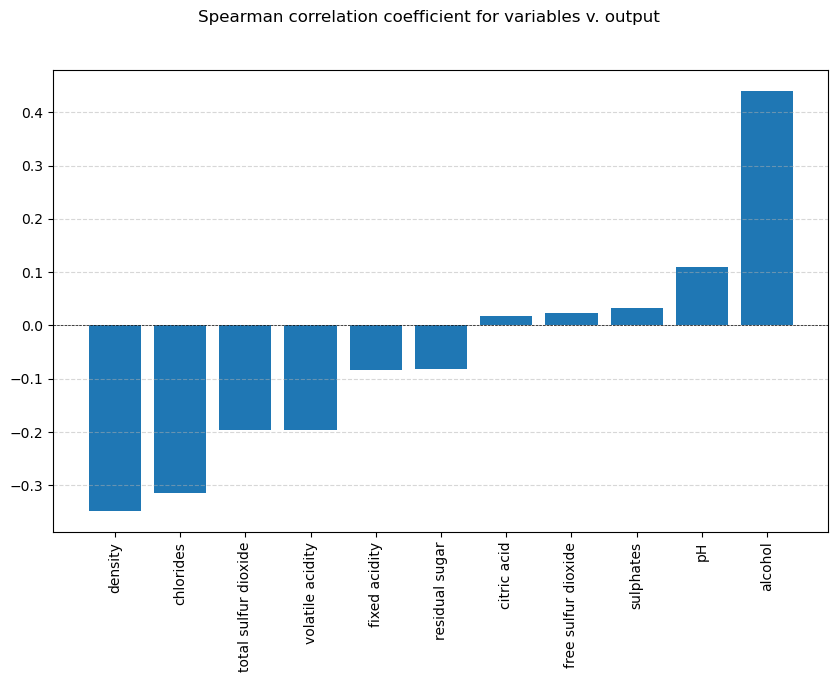

In [7]:
# Conduct Spearman correlation tests on each variable 
# vs. ordinal output ranking (Spearman used due to ordinal result)
print("*************************************************")
print(" Spearman correlation coefficient for variables")
print("*************************************************")
plot_data = {}
for i in range(0, len(white_wines_full.columns)):
    col = white_wines_full.columns[i]
    if col != 'quality':
        corr = stats.spearmanr(white_wines_full[col], white_wines_full['quality'])
        print("{: >20} : {: >20}".format(col, round(corr[0], 4)))
        plot_data[col] = corr[0]
        sort_data = dict(sorted(plot_data.items(), key=lambda x: x[1]))

# generate bar graph plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='vertical', fontsize=10)
ax.axhline(0, color='black', linestyle='--', linewidth=0.5)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.bar(sort_data.keys(), sort_data.values())
fig.suptitle('Spearman correlation coefficient for variables v. output', fontsize=12)
plt.show()

### Exploratory data observations

#### Correlation summary (absolute values used for grouping)

|         | No Correlation (< 0.05)   | Low Correlation (0.05-0.1) | Moderate Correlation (>0.1) |
|---------|-------------------|-----------------|----------------------|
|Positive | free sulfer dioxide, sulfates |     | alcohol, pH
|Negative | citric acid       | fixed acidity, residual sugar   | volatile acidity, chlorides, total sulfur dioxide, density|

**For feature selection, in addition to dataset with all features, recommend experiments with:**

- Include only moderately correlated features (positive and negative): ***volatile acidity, chlorides, total sulfur dioxide, density, alcohol***
- Include only moderate and low correlated features (positive and negative): ***volatile acidity, chlorides, total sulfur dioxide, density, alcohol, fixed acidity, pH, sulfates, res. sugar***


## Data Cleaning
 - Evaluate for possible corrupted values (ie: possibly erronous)
 - Evaluate for any missing data/data gaps
 - Remove any entries that are missing data or appear to be erronous
 

In [8]:
# Start code here
# Drop any null values, duplicates, and round all numbers to certain decimal places.
white_wines_full.dropna()
white_wines_full.drop_duplicates()
decimals = pd.Series([1,2,2,1,3,0,0,3,2,2,1,0], index=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
white_wines_full.round(decimals)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.995,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.991,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.995,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.993,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.989,3.34,0.38,12.8,7


In [9]:
des = white_wines_full.describe()
round(des, 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,0.05,35.31,138.36,0.99,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,0.02,17.01,42.50,0.00,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,0.04,23.00,108.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,0.04,34.00,134.00,0.99,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,0.05,46.00,167.00,1.00,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


In [10]:
white_wines_full.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3731,7.0,0.34,0.26,10.3,0.041,51.0,166.0,0.99382,3.08,0.35,11.6,6


## Data Preparation
-  Slice dataframe into multiple dataframes that contain subset of variables for feature selection experimentation (based on exploratory data analysis)
-  Keep full feature dataset as control set (ie: to compare model performance of feature selected datasets to the full dataset)
-  Split each experimental dataframe into test/train/validate datasets (80/10/10)
-  Perform any normalization of variables if necessary

In [19]:
# Include only moderately correlated features (positive and negative): ***volatile acidity, chlorides, total sulfur dioxide, density, alcohol***
# Include only moderate and low correlated features (positive and negative): ***volatile acidity, chlorides, total sulfur dioxide, density, alcohol, fixed acidity, pH, sulphates res. sugar***

variables = [
    ['density', 'chlorides', 'alcohol'],
    ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol'],
    ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol', 'fixed acidity', 'pH', 'sulphates', 'residual sugar'],   
]

experimental_dfs = []
control_df = white_wines_full.copy()
train_data = []
test_data = []
val_data = []
# for normalization
scaler = StandardScaler()

# slice the dataframe and perform feature selection experimentation
for variable in variables:
    experimental_df = white_wines_full[variable].copy()
    experimental_dfs.append(experimental_df)

    # normalize variables for each experimental dataframe
    experimental_df = pd.DataFrame(scaler.fit_transform(experimental_df), columns=experimental_df.columns)

    # split the experimental dataframe into train/test/validate datasets
    X = experimental_df.copy()
    y = white_wines_full['quality'].copy()
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)
    train_data.append((X_train, y_train))
    test_data.append((X_test, y_test))
    val_data.append((X_val, y_val))

# normalize for control dataset
control_df = pd.DataFrame(scaler.fit_transform(control_df), columns=control_df.columns)

# split the control dataset into train/test/validate datasets
control_df = control_df.drop(columns=['quality'])

X = control_df.copy()
y = white_wines_full['quality'].copy()
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)
train_data.append((X_train, y_train))
test_data.append((X_test, y_test))
val_data.append((X_val, y_val))


## Model Selection
-  Identify 2 models to conduct experiements with (ie: SVM and Random Forest)
-  Train the 2 models on the full feature dataset
-  Test against test dataset
-  Tune hyperparameters as necessary to optimize performance
-  Repeat until optimized
-  Once optimized, retrain instances on the feature selected experimental data sets


## Random Forest Classifier

In [40]:
# Random Forest Classifier Model Experiment Functions

def rf_classifier_train(rf, X_train, y_train):
    rf.fit(X_train, y_train)

def rf_classifier_run_experiment(rf, X_exp, y_exp):
    
    # Run prediction on experiment data
    y_pred = rf.predict(X_exp)

    accuracy = accuracy_score(y_exp, y_pred)
    precision = precision_score(y_exp, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_exp, y_pred, average='macro', zero_division=0)

    print("Accuracy:", round(accuracy, 3))
    print("Precision:", round(precision, 3))
    print("Recall:", round(recall, 3))

    # Create the confusion matrix
    labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    cm = confusion_matrix(y_exp, y_pred, labels=labels)
    
    ConfusionMatrixDisplay(confusion_matrix=cm).plot();
    plt.title('Confusion matrix [0=poor to 10=excellent]')

def rf_feature_importance_plot(rf, X_data):
    
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=X_data.columns)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

def rf_generate_random_grid():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
    return random_grid

def rf_random_grid_hyperparameter_search(rf, X_data, y_data, random_grid, n_iter):
    # Use the random grid to search for best hyperparameters
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = n_iter, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_data, y_data)

    return rf_random

# Run random grid search for hyperparameter optimization
def rf_run_random_grid(rf, X_train, y_train, n):   
    random_grid = rf_generate_random_grid()
    rf_random = rf_random_grid_hyperparameter_search(rf, X_train, y_train, random_grid, 25)
    best_random = rf_random.best_estimator_
    pprint(best_random.get_params())

    # Return the best model
    return best_random



## Experiment 1: Train on Control dataset, Random Forest Classifier

In [20]:
# Start with control dataset - Train with train_data
X_train, y_train = train_data[3]

# Initialize model and train
rf = RandomForestClassifier()
x = rf_classifier_train(rf, X_train, y_train)


Accuracy: 0.673
Precision: 0.643
Recall: 0.425


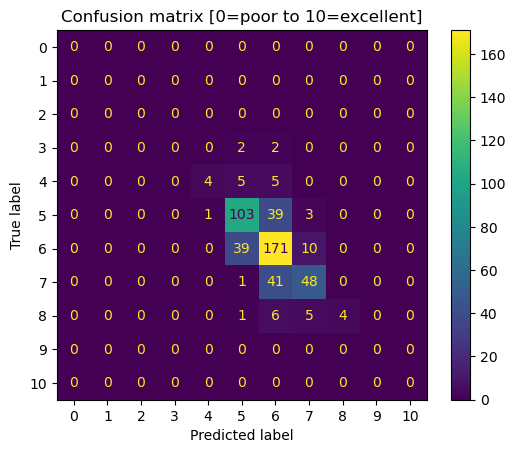

In [21]:
# Run on test set
X_test, y_test = test_data[3]
rf_classifier_run_experiment(rf, X_test, y_test)

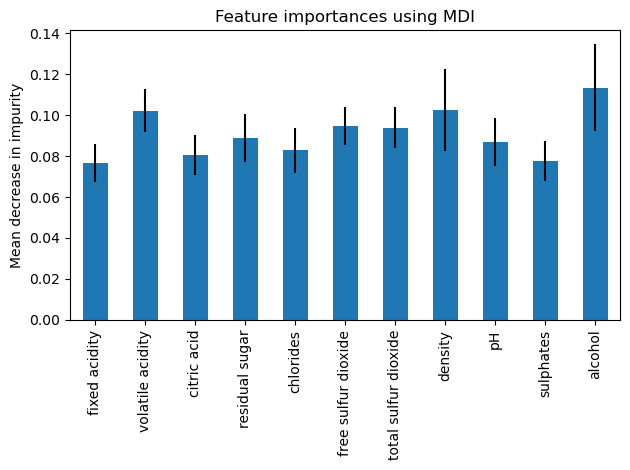

In [22]:
# plot feature importances
rf_feature_importance_plot(rf, X_val)


In [ ]:
# Try random grid to optimize hyperparameters
rf_optimized = rf_run_random_grid(rf, X_train, y_train, 25)
rf_classifier_run_experiment(rf_optimized, X_test, y_test)

## Experiment 2: Feature Selection, train on dataset with only moderately correlated variables, Random Forest Classifier

In [25]:
# Start with control dataset - Train with train_data
X_train, y_train = train_data[1]

# Initialize model and train
rf2 = RandomForestClassifier()
x = rf_classifier_train(rf2, X_train, y_train)

Accuracy: 0.669
Precision: 0.581
Recall: 0.412


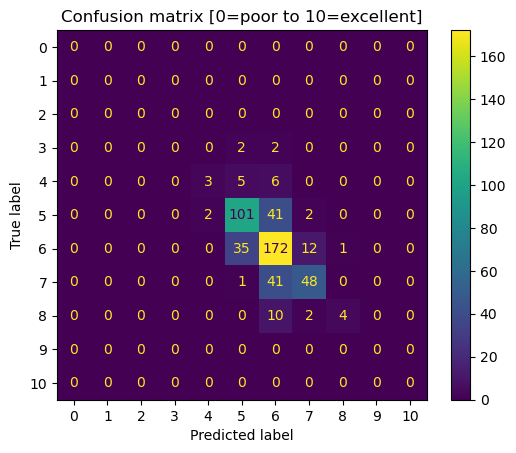

In [26]:
# Run on test set
X_test, y_test = test_data[1]
rf_classifier_run_experiment(rf2, X_test, y_test)

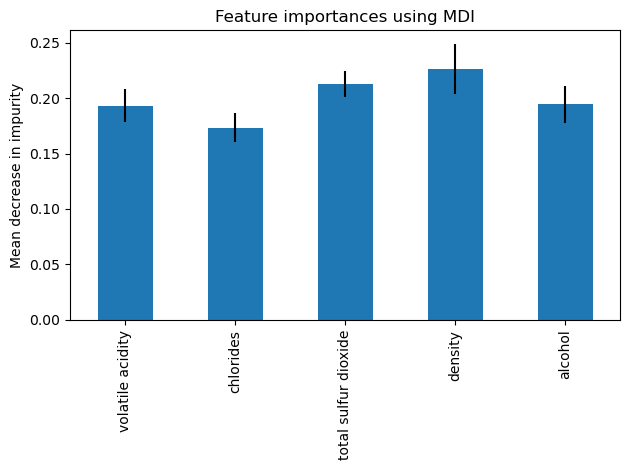

In [27]:
# plot feature importances
rf_feature_importance_plot(rf2, X_test)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.9s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  13.6s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  14.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  14.0s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  15.4s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  13.3s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  14.5s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  24.5s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  24.4s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  16.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=  20.2s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   5.8s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   5.8s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  15.1s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  15.5s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   6.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.7s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  12.0s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  31.9s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  31.3s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  31.2s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  14.3s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=  13.1s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   6.7s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   5.2s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=  24.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=  24.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=  23.9s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   5.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  13.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  12.7s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=  11.7s
[CV] END bootstrap=False, max_depth=20, 

/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  19.7s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  19.9s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  20.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  14.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  14.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  11.5s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  11.5s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  14.9s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=  11.4s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   7.3s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   7.4s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   7.3s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  15.9s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  26.3s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  26.2s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  26.2s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  17.6s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  16.8s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  24.1s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  23.6s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=  12.6s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  23.0s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=  11.9s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=  12.4s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=  17.6s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=  17.3s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=  17.8s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  24.8s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  14.0s


/Users/tylerforeman/anaconda3/envs/base-stats/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  24.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  24.3s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  13.3s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  11.3s
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
Accuracy: 0.688
Precision: 0.685
Recall: 

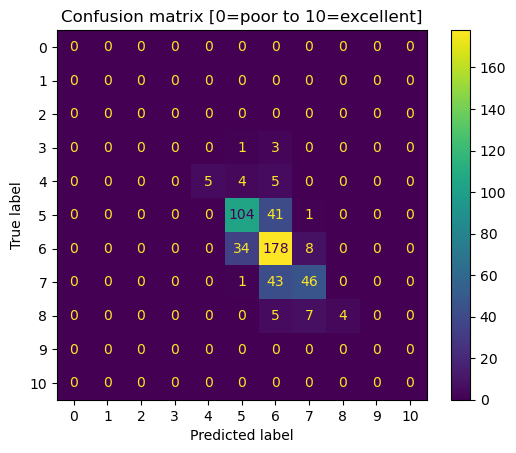

In [42]:
# Try random grid to optimize hyperparameters
rf_optimized_2 = rf_run_random_grid(rf2, X_train, y_train, 25)
rf_classifier_run_experiment(rf_optimized_2, X_test, y_test)

## Experiment 3: Feature Selection, train on dataset with moderately and low correlated variables, Random Forest Classifier

In [28]:
# Start with control dataset - Train with train_data
X_train, y_train = train_data[2]

# Initialize model and train
rf3 = RandomForestClassifier()
x = rf_classifier_train(rf3, X_train, y_train)

Accuracy: 0.688
Precision: 0.655
Recall: 0.43


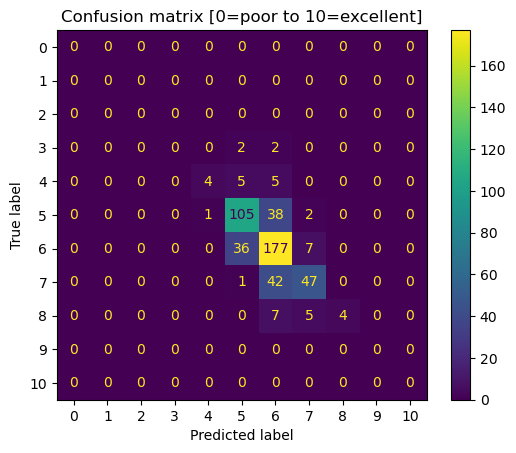

In [29]:
# Run on test set
X_test, y_test = test_data[2]
rf_classifier_run_experiment(rf3, X_test, y_test)

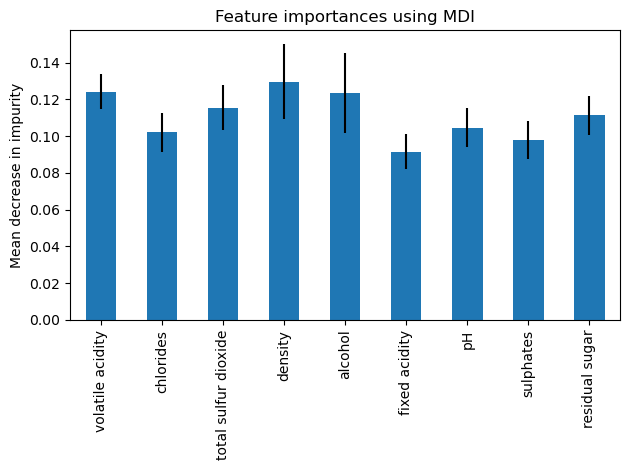

In [38]:
# plot feature importances
rf_feature_importance_plot(rf3, X_test)

In [ ]:
# Try random grid to optimize hyperparameters
rf_optimized_3 = rf_run_random_grid(rf3, X_train, y_train, 25)
rf_classifier_run_experiment(rf_optimized_3, X_test, y_test)

# SVM Model
## Experiment 1: Train on Control dataset, SVM

In [ ]:
def svm_classifier_train(svm_model, X_train, y_train):
    svm_model.fit(X_train, y_train)

def svm_classifier_run_experiment(svm_model, X_exp, y_exp):
    
    # Run prediction on experiment data
    y_pred = svm_model.predict(X_exp)

    accuracy = accuracy_score(y_exp, y_pred)
    precision = precision_score(y_exp, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_exp, y_pred, average='macro', zero_division=0)

    print("Accuracy:", round(accuracy, 3))
    print("Precision:", round(precision, 3))
    print("Recall:", round(recall, 3))

    # Create the confusion matrix
    labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    cm = confusion_matrix(y_exp, y_pred, labels=labels)
    
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title('Confusion matrix [0=poor to 10=excellent]')

In [ ]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'] 

# Start with control dataset - Train with train_data
X_train, y_train = train_data[3]
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)

# Initialize model and train
svm_model = svm.SVC()
svm_classifier_train(svm_model, X_train, y_train)

Accuracy: 0.584
Precision: 0.401
Recall: 0.3


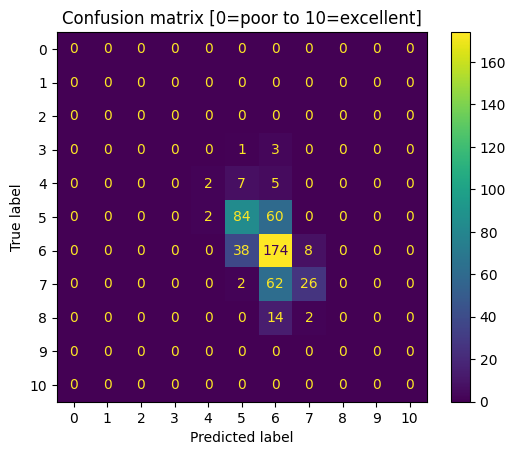

In [ ]:
# Run on test set
X_test, y_test = test_data[3]
X_test = pd.DataFrame(scaler.transform(X_test), columns=columns)  # Scale the test data with the same scaler
svm_classifier_run_experiment(svm_model, X_test, y_test)

Accuracy: 0.539
Precision: 0.281
Recall: 0.256


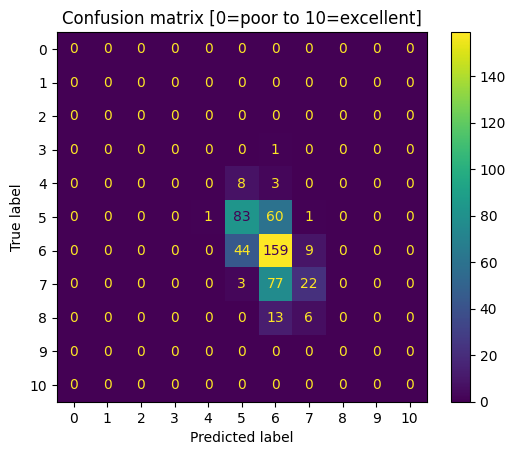

In [ ]:
# Run on validation set
X_val, y_val = val_data[3]
X_val = pd.DataFrame(scaler.transform(X_val), columns=columns)  # Scale the validation data with the same scaler
svm_classifier_run_experiment(svm_model, X_val, y_val)

## Experiment 2: Feature Selection, train on dataset with 3 highest values from feature importance chart, SVM

In [ ]:
# Top 3 based on rfc feature importance
important_features = ['alcohol', 'density', 'volatile acidity']
X_train_imp = X_train[important_features]
X_test_imp = X_test[important_features]
X_val_imp = X_val[important_features]

In [ ]:
# Initialize model and train
svm_model = svm.SVC()
svm_classifier_train(svm_model, X_train_imp, y_train)

Accuracy: 0.516
Precision: 0.266
Recall: 0.235


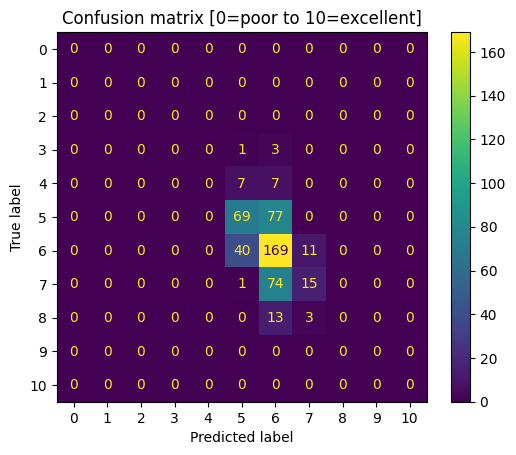

In [ ]:
# Run on test set
svm_classifier_run_experiment(svm_model, X_test_imp, y_test)

Accuracy: 0.49
Precision: 0.245
Recall: 0.222


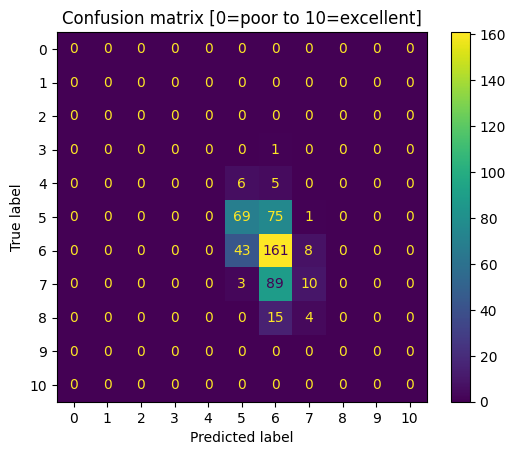

In [ ]:
# Run on validation set
svm_classifier_run_experiment(svm_model, X_val_imp, y_val)

## Model Analysis

-  For full feature data set:
    -  Run models against validation data sets 
    -  Evaluate performance
    -  Compare peformance of two models against validation sets
    -  Make recommendation on model selection

- For each experimental feature selected dataset:
    -  Run models against validation data sets 
    -  Evaluate performance
    -  Compare peformance of two models against validation sets
    -  Make recommendation on feature selection (which features are important and those that are not for making accurate predictions)



## Random Forest Analysis

Accuracy: 0.704
Precision: 0.578
Recall: 0.485


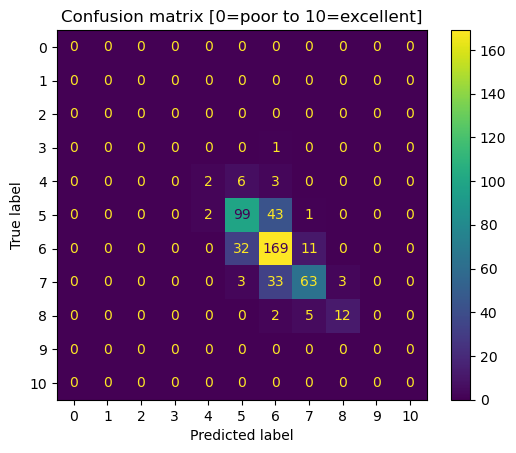

In [32]:
# Experiment 1: validation data set
X_val, y_val = val_data[3]
rf_classifier_run_experiment(rf, X_val, y_val)

Accuracy: 0.669
Precision: 0.545
Recall: 0.443


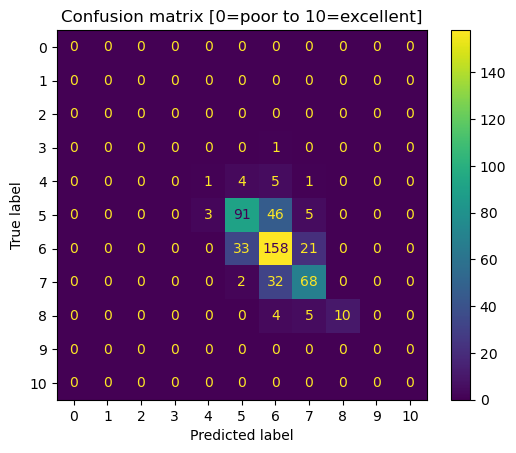

In [36]:
# Experiment 2: validation data set
X_val, y_val = val_data[1]
rf_classifier_run_experiment(rf2, X_val, y_val)

Accuracy: 0.692
Precision: 0.593
Recall: 0.476


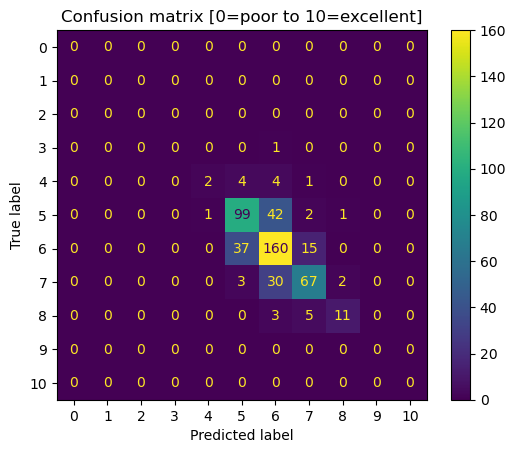

In [37]:
# Experiment 3: validation data set
X_val, y_val = val_data[2]
rf_classifier_run_experiment(rf3, X_val, y_val)